# Demo2: Simple Harmonic Oscillator with RK2/RK4

In this jupyter notebook, we will learn how to use the Runge-Kutta 2/4 methods to solve for the motions of a simple harmonic oscillaotr.

&copy; Kuo-Chuan Pan, 2024\
For the course "Computational Physics" at NTHU

### Governing equations

The governing equations are 
$$
a^{t^n} = - \omega_0^2 x^{t^n},
$$

$$
\frac{dx}{dt} = v,
$$
and 
$$
\frac{dv}{dt} = a.
$$


### Runge-Jutta methods

Higher-order explicit schemes.

* RK2

$$
y_{k+1} = y_k + \frac{h_k}{2}(k_1 + k2),
$$
where $k_1 = f(t_k, y_k)$ and $k_2 = f(t_k+h_k, y_k + h_k k1)$.

* RK4

$$
y_{k+1} = y_k + \frac{h_k}{6}(k_1 +2k_2 +2k_3+k_4),
$$
where $k_1= f(t_k,y_k)$, $k_2=f(t_k+h_k/2, y_k + (h_k/2)k_1)$,
$k_3=f(t_k+h_k/2, y_k + (h_k/2)k_2)$, and $k_4=f(t_k+h_k, y_k+h_k k3)$.


### Initial Conditions

At time $t=0$, position $x=1$ and velocity $v=0$.\
Set $A=k=m=1$, and $\omega_0=\sqrt{k/m}=1$ as well.

## Exercie 1: Redo demo1 with the RK2 method
Use a small time step $\Delta t=0.01$ and solve for the solution at $t=20$.

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("tableau-colorblind10")
# plt.style.use("seaborn-v0_8-colorblind")
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = ":"

In [2]:
# This is a simple example of how to solve a simple harmonic oscillator using the RK2 method
# https://math.libretexts.org/Bookshelves/Differential_Equations/Numerically_Solving_Ordinary_Differential_Equations_(Brorson)/01%3A_Chapters/1.04%3A_Predictor-corrector_methods_and_Runge-Kutta
# Step 1: set up the parameters of the problem
A = 1
k = 1
m = 1
omega_0 = np.sqrt(k / m)
dt = 0.01
t_0 = 0
t_f = 20


def f(x, y):
    return y


def g(x, y):
    k = 1
    m = 1
    return -(k / m) * y


def euler(f, x, y, dt):
    return x + dt * f(x, y)
    

def rk2(f, x, y, dt):
    k_1 = dt * f(x, y)
    k_2 = dt * f(x + (k_1 / 2), y + (dt / 2))
    return x + k_2


# Step 2: set up the time and solution arrays
t_span = np.arange(t_0, t_f, dt)
x = np.zeros_like(t_span)
v = np.zeros_like(t_span)

# Step 3: set up the initial conditions
x[0] = 1
v[0] = 0

# Step 4: solve the difference equation using the Euler method
for n, t in enumerate(t_span[:-1]):
    x[n + 1] = rk2(f, x[n], v[n], dt)
    v[n + 1] = rk2(g, v[n], x[n], dt)
    # Both of the above could be vectorised. A good exercise for us students.

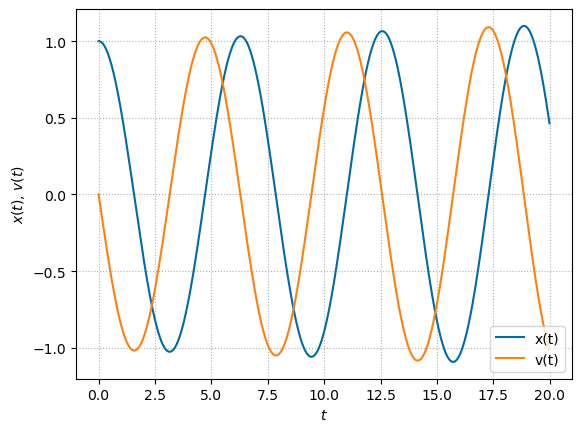

In [3]:
# Step 5: plot the solution
fig, ax = plt.subplots()
ax.plot(t_span, x, label=r"x(t)")
ax.plot(t_span, v, label=r"v(t)")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$, $v(t)$")
ax.legend()

We could verify our numerical solution be comparing it with the analytical solutions.
The analytical solutions are:

$$
x = A \cos(\omega_0 t + \phi),
$$
and

$$
v = -A \omega_0 \sin(\omega_0 t + \delta).
$$

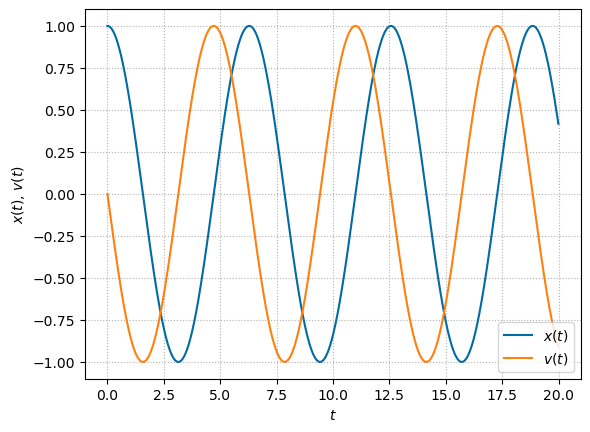

In [4]:
# Step 6: evaluate the analytical solution
phi = 0
delta = 0
x_analytic = A * np.cos(omega_0 * t_span + phi)
v_analytic = -A * omega_0 * np.sin(omega_0 * t_span + delta)
fig, ax = plt.subplots()
ax.plot(t_span, x_analytic, label=r"$x(t)$")
ax.plot(t_span, v_analytic, label=r"$v(t)$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$, $v(t)$")
ax.legend()

Another way to chekc the accuray of our numerical solution is to check the energy conservation and the phase-sapce diagram.

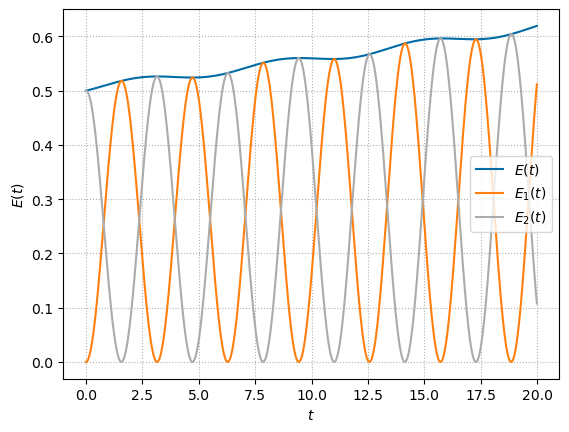

In [5]:
# Step 7: evaluate the energy (error) of the system
E = (1 / 2) * m * v**2 + (1 / 2) * k * x**2
E_1 = (1 / 2) * m * v**2
E_2 = (1 / 2) * k * x**2
fig, ax = plt.subplots()
ax.plot(t_span, E, label=r"$E(t)$")
ax.plot(t_span, E_1, label=r"$E_1(t)$")
ax.plot(t_span, E_2, label=r"$E_2(t)$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$E(t)$")
ax.legend()

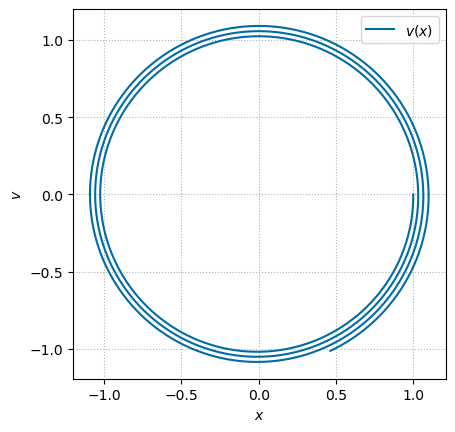

In [6]:
# Step 8: evaluate the phase space
fig, ax = plt.subplots()
ax.plot(x, v, label=r"$v(x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$v$")
ax.set_aspect("equal")
ax.legend()

## Exercise 2: Repeat with RK4


In [7]:
#
# This is a simple example of how to solve a simple harmonic oscillator using the RK4 method
#
def rk4(f, x, y, dt):
    k_1 = dt * f(x, y)
    k_2 = dt * f(x + (k_1 / 2), y + (dt / 2))
    k_3 = dt * f(x + (k_2 / 2), y + (dt / 2))
    k_4 = dt * f(x + k_3, y + dt)
    return x + (k_1 / 6) + (k_2 / 3) + (k_3 / 3) + (k_4 / 6)


# Step 2: set up the time and solution arrays
t_span = np.arange(t_0, t_f, dt)
x = np.zeros_like(t_span)
v = np.zeros_like(t_span)

# Step 3: set up the initial conditions
x[0] = 1
v[0] = 0

# Step 4: solve the difference equation using the Euler method
for n, t in enumerate(t_span[:-1]):
    x[n + 1] = rk4(f, x[n], v[n], dt)
    v[n + 1] = rk4(g, v[n], x[n], dt)

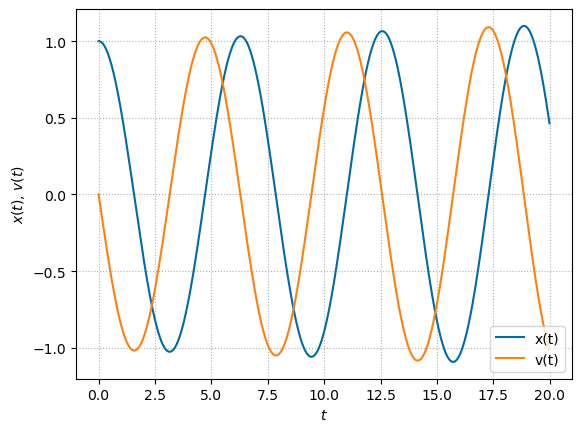

In [8]:
# Step 5: plot the solution
fig, ax = plt.subplots()
ax.plot(t_span, x, label=r"x(t)")
ax.plot(t_span, v, label=r"v(t)")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$x(t)$, $v(t)$")
ax.legend()

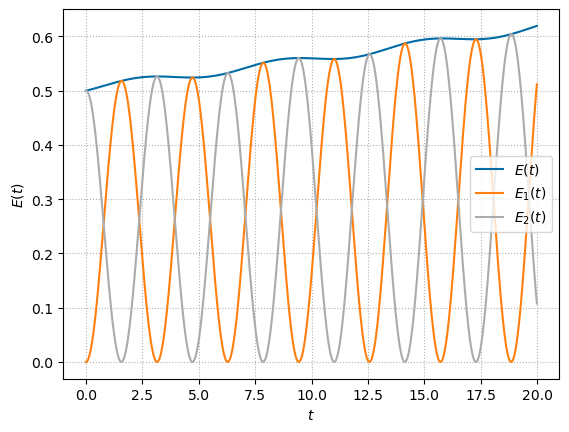

In [9]:
# Step 7: evaluate the energy (error) of the system
# https://young.physics.ucsc.edu/115/ode_solve.pdf
E = (1 / 2) * m * v**2 + (1 / 2) * k * x**2
E_1 = (1 / 2) * m * v**2
E_2 = (1 / 2) * k * x**2
fig, ax = plt.subplots()
ax.plot(t_span, E, label=r"$E(t)$")
ax.plot(t_span, E_1, label=r"$E_1(t)$")
ax.plot(t_span, E_2, label=r"$E_2(t)$")
ax.set_xlabel(r"$t$")
ax.set_ylabel(r"$E(t)$")
ax.legend()

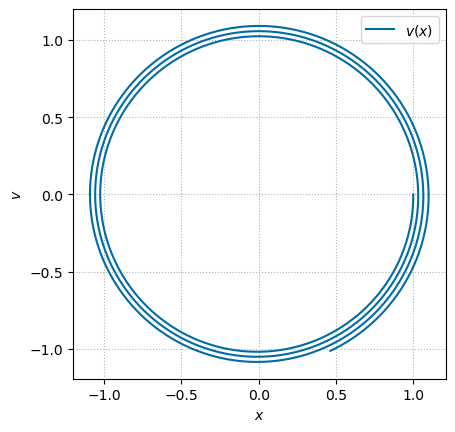

In [10]:
fig, ax = plt.subplots()
ax.plot(x, v, label=r"$v(x)$")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$v$")
ax.set_aspect("equal")
ax.legend()

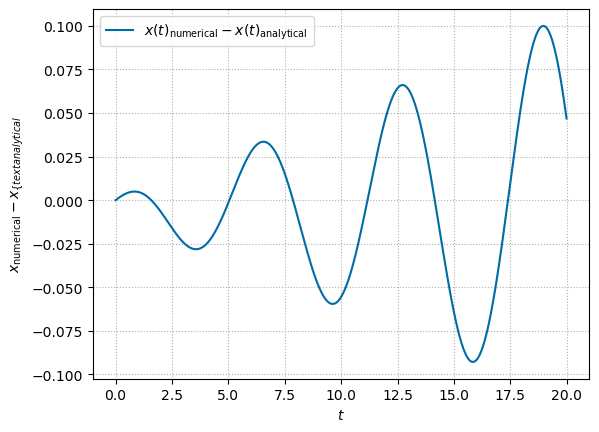

In [11]:
fig, ax = plt.subplots()
ax.plot(t_span, x - x_analytic, label=r'$x(t)_{\text{numerical}} - x(t)_{\text{analytical}}$')
# ax.plot(t_span, x_analytic, label=r'x(t), analytical')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x_{\text{numerical}} - x_{\{text{analytical}}$')
ax.legend()

Error of Euler, RK2, and RK4 compared. With $t_f = 2*\pi$ instead of $t_f = 20$ to make the difference more obvious.

In [12]:
t_0 = 0
t_f = 2 * np.pi
t_span = np.arange(t_0, t_f, dt)

x_euler = np.zeros_like(t_span)
v_euler = np.zeros_like(t_span)
x_rk2 = np.zeros_like(t_span)
v_rk2 = np.zeros_like(t_span)
x_rk4 = np.zeros_like(t_span)
v_rk4 = np.zeros_like(t_span)

x_euler[0] = 1
v_euler[0] = 0
x_rk2[0] = 1
v_rk2[0] = 0
x_rk4[0] = 1
v_rk4[0] = 0

for n, t in enumerate(t_span[:-1]):
    x_euler[n + 1] = euler(f, x_euler[n], v_euler[n], dt)
    v_euler[n + 1] = euler(g, v_euler[n], x_euler[n], dt)
    x_rk2[n + 1] = rk2(f, x_rk2[n], v_rk2[n], dt)
    v_rk2[n + 1] = rk2(g, v_rk2[n], x_rk2[n], dt)
    x_rk4[n + 1] = rk4(f, x_rk4[n], v_rk4[n], dt)
    v_rk4[n + 1] = rk4(g, v_rk4[n], x_rk4[n], dt)

phi = 0
delta = 0
x_analytic = A * np.cos(omega_0 * t_span + phi)
v_analytic = -A * omega_0 * np.sin(omega_0 * t_span + delta)

Text(0, 0.5, '$x$')

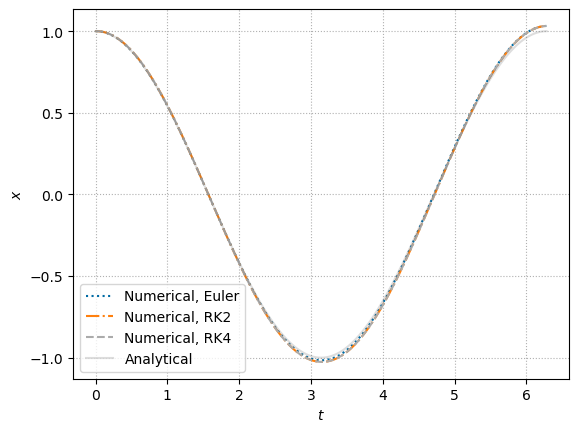

In [13]:
fig, ax = plt.subplots()
# ax.plot(t_span, x_euler, '-<', markevery=20, label=r'Numerical, Euler')
# ax.plot(t_span, x_rk2, ':>', markevery=20, label=r'Numerical, RK2')
# ax.plot(t_span, x_rk4, '--^', markevery=20, label=r'Numerical, RK4')
# ax.plot(t_span, x_analytic, '-.v', markevery=20, label=r'Analytical')
ax.plot(t_span, x_euler, ':', label=r'Numerical, Euler')
ax.plot(t_span, x_rk2, '-.', label=r'Numerical, RK2')
ax.plot(t_span, x_rk4, '--', label=r'Numerical, RK4')
ax.plot(t_span, x_analytic, '-', alpha=0.2, label=r'Analytical')
ax.legend()
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x$')
# ax.set_ylim((1.0, 2.0))

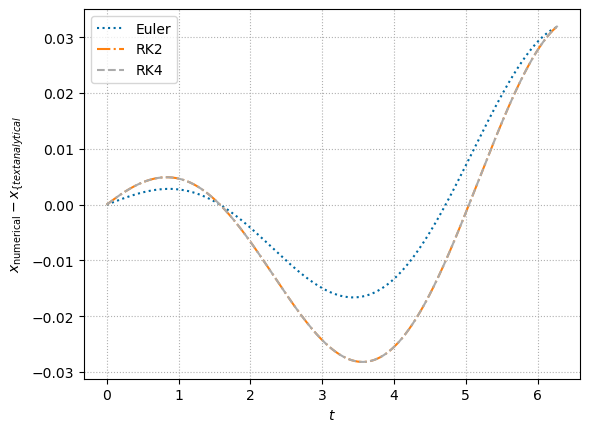

In [14]:
fig, ax = plt.subplots()
ax.plot(t_span, x_euler - x_analytic, ':', label=r'Euler')
ax.plot(t_span, x_rk2 - x_analytic, '-.', label=r'RK2')
ax.plot(t_span, x_rk4 - x_analytic, '--', label=r'RK4')
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$x_{\text{numerical}} - x_{\{text{analytical}}$')
ax.legend()